In [1]:
import os
import glob
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import clima_anom as ca

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# json_method = 'AMA_pearson'
# json_method = 'AMA_spearman'
# json_method = 'AMA_kendall'
json_method = 'SA_sync'

In [3]:
with open ('../../json/directories.json') as f:
    dirs = json.load(f)

json_read = dirs['json_CN'] + json_method+'.json'
print(f'Read json: {json_read}')

with open (json_read) as f:
    info = json.load(f)

Read json: ../../../Complex-Network-AS/json/SA_sync.json


In [4]:
product = info['product']
season = info['season']
region = info['region']
pentad = info['pentad']
ocean = info['ocean']
method = info['method']
centrado = info['centrado']
normalized = info['normalized']

percentile_limit = info['percentile_limit']
tau = info['tau']

min_mean = info['remove_serie_min_mean']
MLV = info['Percent_links_ignore']
rain_LT1 = info['remove_rain_LT_1']

# font = os.environ['COMPUTERNAME']

# print(f'Font      : {font}')
print(f'Product   : {product}')
print(f'Region   : {region}')
print()
print(f'Season    : {season}')
print(f'Pentad    : {pentad}')
print(f'Ocean     : {ocean}')
print()
print(f'Method    : {method}')
print()
print(f'Tau       : {tau}')
print()
print(f'Percentile Limit: {percentile_limit}')
print(f'Centered        : {centrado}')
print(f'Normalized      : {normalized}')
print()
print(f'Remove Serie with min mean : {min_mean}')
print(f'Remove Serie with rain < 1 : {rain_LT1}')
print(f'Minimun link value (MLV)   : {MLV}%')

if rain_LT1 == 'yes':
    LT_1 = 'LT1Y'
else:
    LT_1 = 'LT1N'

if percentile_limit == 90 or percentile_limit == 95 or percentile_limit == 99:
    PL_limit = percentile_limit
else:
    PL_limit = 'N'

if ocean == 'woc':
    OC = 'WOC'
else:
    OC = 'NOC'

if tau == 'no':
    TA = 'TAUN'
else:
    TA = 'TAU'+str(tau)

Product   : IMERG
Region   : SA

Season    : summer
Pentad    : no
Ocean     : noc

Method    : sync

Tau       : 3

Percentile Limit: 90
Centered        : no
Normalized      : no

Remove Serie with min mean : 1
Remove Serie with rain < 1 : yes
Minimun link value (MLV)   : 98%


In [5]:
if os.environ['COMPUTERNAME'] == 'DELL_LAPTOP':
    export_dir = 'D:/Data/PF/ENSEMBLE/ENSEMBLE_SA/' + method + '/'
    PF_ensemble_files = 'D:\Data\PF\ENSEMBLE\list\TRMM_GPM_summer_200012_2021_02.csv'
else:
    export_dir = dirs['dir_ENSEMBLE'] + region + '/' + method + '/'
    PF_ensemble_files = dirs['dir_ENSEMBLE_list']

print(os.environ['COMPUTERNAME'])
print(f'Export dir: {export_dir}')

idell
Export dir: /mnt/Data/Data/PF/ENSEMBLE/SA/sync/


In [6]:
comms_file = region+'_'+product+'_05x05_'+method+'_'+season+'_'+LT_1+'_PL'+str(PL_limit)+'_PEN_MM'+str(min_mean)+'_MLV'+str(100-MLV)+'_'+TA
print(f'Comms file: {comms_file}')

Comms file: SA_IMERG_05x05_sync_summer_LT1Y_PL90_PEN_MM1_MLV2_TAU3


In [7]:
file_list = pd.read_csv(PF_ensemble_files + 'TRMM_GPM_summer_200012_2021_02.csv')
len_files = len(file_list)
print(f'Files Number: {len_files}')
print(file_list['file_name'].iloc[0])
print(file_list['file_name'].iloc[-1])

Files Number: 63
/mnt/Data/Data/PF/TRMM/rpf_SA/rpf_200012_level2.csv
/mnt/Data/Data/PF/GPM/rgpf_SA/rgpf_202102_level2.csv


In [8]:
communities_poligon = gpd.read_file(dirs['dir_comm'] + comms_file + '.geojson')
communities_index = communities_poligon['id'].values.astype(int)
communities_index

array([1, 2])

In [9]:
Comunidad_file = dirs['dir_comm'] + comms_file + '.shp'
Comunidades = gpd.read_file(Comunidad_file)
num_comm = len(Comunidades)
print(f'Number of Communities: {num_comm}')

Number of Communities: 2


/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


Text(0.0, 1.0, 'Communities')

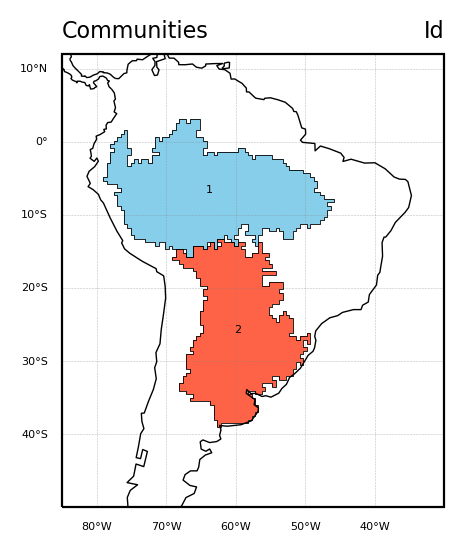

In [10]:
cmap = plt.cm.tab20
tmap = ca.colorbar_middle_white(cmap,position='left',n=39)
colors = ['skyblue', 'tomato']

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(3,3),dpi=200)
gs = gridspec.GridSpec(1,1)
plt.style.use('default')

#=====================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-85,-30,-50,12],crs=proj)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}
communities_poligon.plot("id", ax=ax1, color=colors)
communities_poligon.exterior.plot(ax=ax1,color='k',linestyle='-',linewidth=0.3)
communities_poligon.apply(lambda x: ax1.annotate(text=int(x['id']), xy=x.geometry.centroid.coords[0], fontsize=4, ha='center'), axis=1)


ax1.set_title('Id',fontsize=8, loc='right')
ax1.set_title('Communities',fontsize=8, loc='left')

In [11]:
# # test names
# comm_id = communities_index[0]
# comm_name = comms_file + '_C'+str(comm_id).zfill(3)
# salida = export_dir + comm_name + '.csv'
# salida

In [12]:
for comm_id in range(1,2):#num_comm

    comm_id_new = communities_index[comm_id]
    print(f'Community: {comm_id}')

    for nn in range(len_files):

        if os.environ['COMPUTERNAME'] == 'DELL_LAPTOP':
            data = pd.read_csv(file_list['file_name'][nn].replace('/mnt/Data/Data/PF/','D:/Data/PF/'))
        else:
            data = pd.read_csv(file_list['file_name'][nn], sep=',')

        data[data==-88.88] = np.nan
        data[data==-99.99] = np.nan

        PF_GPD = gpd.GeoDataFrame(data[data.columns[2:]], geometry=gpd.points_from_xy(data['lon'],data['lat'], crs="EPSG:4326"))
        num_points = len(PF_GPD['geometry']) 

        points_interception = [] 

        for t in range(num_points):

            if Comunidades['geometry'][comm_id].contains(PF_GPD['geometry'][t]) == True:
                points_interception.append(t)

        dic_tmp = data.loc[points_interception]
        dic_tmp = dic_tmp.reset_index(drop=True)

        if nn == 0:
            dict_out = dic_tmp

        else:
            dict_out = pd.concat([dic_tmp, dict_out], axis=0)

        # print(f'Points in the community: {len(dic_tmp)}')

    comm_name = comms_file + '_C'+str(comm_id_new).zfill(3)
    salida = export_dir + comm_name + '.csv'
    print(f'Exporting data to {salida}')
    dict_out.to_csv(salida,header=True,index=False)

Community: 1
Exporting data to /mnt/Data/Data/PF/ENSEMBLE/SA/sync/SA_IMERG_05x05_sync_summer_LT1Y_PL90_PEN_MM1_MLV2_TAU3_C002.csv


In [13]:
dict_out.head(5)

,lat,lon,YEAR,MONTH,DAY,HOUR,ORBIT,NPIXELS_20DBZ,NPIXELS_30DBZ,NPIXELS_40DBZ,...,15.5,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5,20.0
0,-17.008650,-67.41264,2021,2,1,1,39364,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-16.803019,-67.48033,2021,2,1,1,39364,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-16.923903,-67.27410,2021,2,1,1,39364,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-16.629154,-67.78626,2021,2,1,1,39364,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-16.202349,-68.15774,2021,2,1,1,39364,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


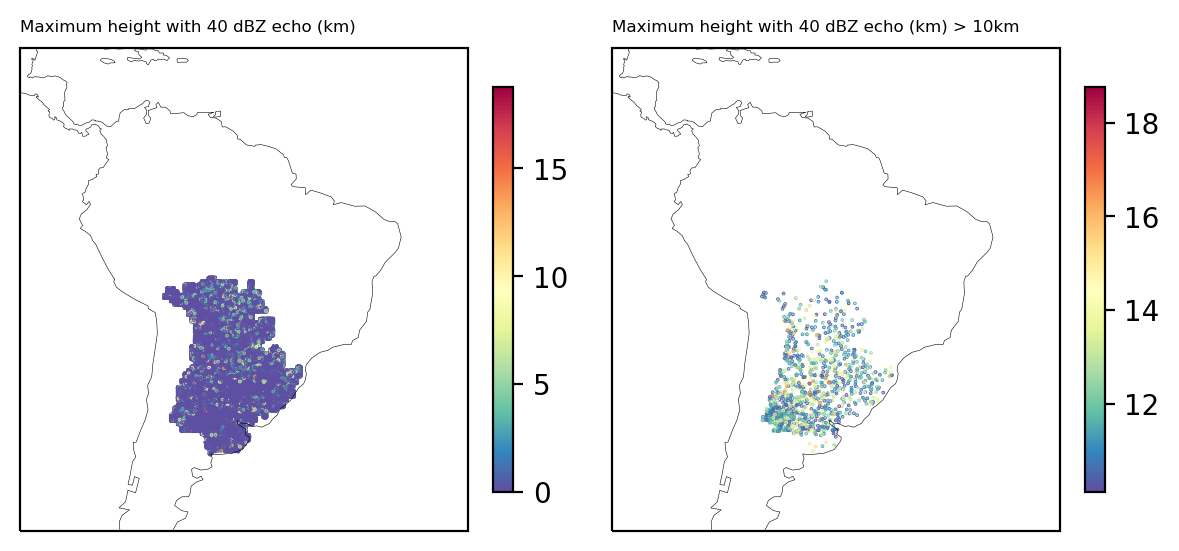

In [14]:
alt_ref = 10

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(7,4),dpi=200)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-90,-25,-50,20],crs=proj)
a1 = ax1.scatter(dict_out['lon'],dict_out['lat'],c=dict_out['MAXHT40'],cmap=cmap,s=0.1,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km)',fontsize=6,loc='left')
plt.colorbar(a1,fraction=0.041)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-90,-25,-50,20],crs=proj)
a1 = ax1.scatter(dict_out['lon'][dict_out['MAXHT40']>alt_ref],dict_out['lat'][dict_out['MAXHT40']>alt_ref],c=dict_out['MAXHT40'][dict_out['MAXHT40']>alt_ref],cmap=cmap,s=0.1,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref)+'km',fontsize=6,loc='left')
plt.colorbar(a1,fraction=0.041)